<a href="https://colab.research.google.com/github/Prakhosha/Used-cars-analysis/blob/master/Used_cars_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Prakhosha/DSA_Compfest

fatal: destination path 'DSA_Compfest' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
PATH = 'DSA_Compfest/used_car_data.csv'
raw_data = pd.read_csv(PATH)
raw_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


## **What car brands are available and how many cars are there for each?**

Asumsi: Merk mobil diberikan oleh kata pertama kolom 'Name'

In [ ]:
merk_mobil = pd.DataFrame(data={'Name' : raw_data.Name.str.split().str.get(0).str.lower()})
merk_mobil = pd.DataFrame(merk_mobil.groupby(merk_mobil.Name.tolist(),as_index=False).size()).rename(columns={0:'Jumlah Mobil'})
merk_mobil

Index(['ambassador', 'audi', 'bentley', 'bmw', 'chevrolet', 'datsun', 'fiat',
       'force', 'ford', 'honda', 'hyundai', 'isuzu', 'jaguar', 'jeep',
       'lamborghini', 'land', 'mahindra', 'maruti', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'porsche', 'renault', 'skoda', 'smart', 'tata',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object')

## **What city has the most used cars?**

In [ ]:
# Ambil kolom 'Location' dan 'Owner_Type' dari data mentah
lokasi_mobil_bekas = pd.DataFrame(data={'lokasi':raw_data.Location,
                                        'kepemilikian':raw_data.Owner_Type})

# Hitung jumlah mobil bekas di setiap kota dengan cara mengelompokkannya berdasarkan kolom 'lokasi'
lokasi_mobil_bekas = pd.DataFrame(lokasi_mobil_bekas.groupby(lokasi_mobil_bekas.lokasi.tolist(),as_index=False).size()).rename(columns={0:w'Jumlah Mobil'})

# Urutkan data berdasarkan jumlah mobil dari yang terbanyak hingga paling sedikit
lokasi_mobil_bekas.sort_values(by='Jumlah Mobil', ascending=False)

,Jumlah Mobil
Mumbai,790
Hyderabad,742
Kochi,651
Coimbatore,636
Pune,622
Delhi,554
Kolkata,535
Chennai,494
Jaipur,413
Bangalore,358


## **How is the distribution of the used cars' editions?**

In [ ]:
mobil_bekas = pd.DataFrame(data={'lokasi':raw_data.Location,
                                 'kepemilikian':raw_data.Owner_Type,
                                 'tahun':raw_data.Year})

mobil_bekas = mobil_bekas[mobil_bekas.kepemilikian != 'First']
tahun_mobil_bekas = pd.DataFrame(mobil_bekas.groupby(mobil_bekas.tahun.tolist(), as_index=False).size()).rename(columns={0:'Jumlah Mobil'})

fig = px.bar(tahun_mobil_bekas, x=tahun_mobil_bekas.index, y='Jumlah Mobil', title='Grafik Jumlah Mobil Bekas per Tahun')
fig.show()

## **How many cars have a total usage distance of under 100,000 kilometers?**

In [ ]:
#kolom kilometer driven diambil
df = raw_data[raw_data.Kilometers_Driven < 100000 ]
print("Mobil yang memiliki tota jarak pemakaian di bawah 100.000 kilomoter berjumlah " + str(len(df)))

Mobil yang memiliki tota jarak pemakaian di bawah 100.000 kilomoter berjumlah 5470


## **At what limit can the total distance of use be categorized as low or high?**

Pengkategorian bisa dilakukan dengan memperhatikan kecenderungan jarak pemakaian

In [ ]:
# Ambil kolom Kilometers_Driven
df = pd.DataFrame(data={'Jarak_Pemakaian':raw_data.Kilometers_Driven})
Q1 = df['Jarak_Pemakaian'].quantile(0.25)
Q3 = df['Jarak_Pemakaian'].quantile(0.75)
IQR = Q3 - Q1

filtered = df.query('(@Q1 - 1.5 * @IQR) <= Jarak_Pemakaian <= (@Q3 + 1.5 * @IQR)')
df = df.join(filtered, rsuffix='_filtered')

# Hitung rata-rata Jarak_Pemakaian
rerata = df['Jarak_Pemakaian_filtered'].mean()

# Hitung standar standar deviasu Jarak__Pemakaian
std = df['Jarak_Pemakaian_filtered'].std()

print('Rata-rata jarak pemakaian keseluruhan mobil: ' + "{:.3f}".format(rerata) + ' Km')
print('Standar deviasi jarak pemakaian keseluruhan mobil: ' + "{:.3f}".format(std) + ' Km')

batas_bawah = rerata-std
batas_atas = rerata+std

# Pengkategorian jarak pemakaian berdasarkan rerata dan standar deviasi
dummy = []
for i in range(len(df.Jarak_Pemakaian_filtered)):
  # kategori rendah
  if df.Jarak_Pemakaian_filtered[i] <= batas_bawah:
    dummy.append('Rendah')
  #kategori tinggi
  elif df.Jarak_Pemakaian_filtered[i] > batas_atas:
    dummy.append('Tinggi')
  #kategori tengah
  else : dummy.append('Sedang')

df2 = pd.DataFrame(data={'Jarak_Pemakaian_filtered':df.Jarak_Pemakaian_filtered,
                         'Kategori':dummy})
df2.head(11)

Rata-rata jarak pemakaian keseluruhan mobil: 53488.811 Km
Standar deviasi jarak pemakaian keseluruhan mobil: 27009.395 Km


,Jarak_Pemakaian_filtered,Kategori
0,72000.0,Sedang
1,41000.0,Sedang
2,46000.0,Sedang
3,87000.0,Tinggi
4,40670.0,Sedang
5,75000.0,Sedang
6,86999.0,Tinggi
7,36000.0,Sedang
8,64430.0,Sedang
9,65932.0,Sedang


In [ ]:
df_rendah = pd.DataFrame(raw_data[raw_data.Kilometers_Driven < rerata])
df_rendah

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...
6012,Toyota Innova 2.5 V Diesel 7-seater,Coimbatore,2011,45004,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,9.48
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [ ]:
df_tinggi = pd.DataFrame(raw_data[raw_data.Kilometers_Driven >= rerata])
df_tinggi

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
...,...,...,...,...,...,...,...,...,...,...,...,...
6004,Hyundai Getz GLE,Coimbatore,2007,66800,Petrol,Manual,First,15.3 kmpl,1341 CC,83 bhp,5.0,2.20
6006,Mercedes-Benz M-Class ML 320 CDI,Mumbai,2009,102002,Diesel,Automatic,First,8.7 kmpl,2987 CC,224.34 bhp,5.0,10.75
6007,Maruti Swift Dzire Vdi BSIV,Delhi,2011,68000,Diesel,Manual,First,19.3 kmpl,1248 CC,73.9 bhp,5.0,2.75
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,4.83


## **Are there any outliers in the Kilometers_Driven column?**

Pake Interquartile

https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
https://www.thoughtco.com/https://www.thoughtco.com/what-is-an-outlier-3126227#

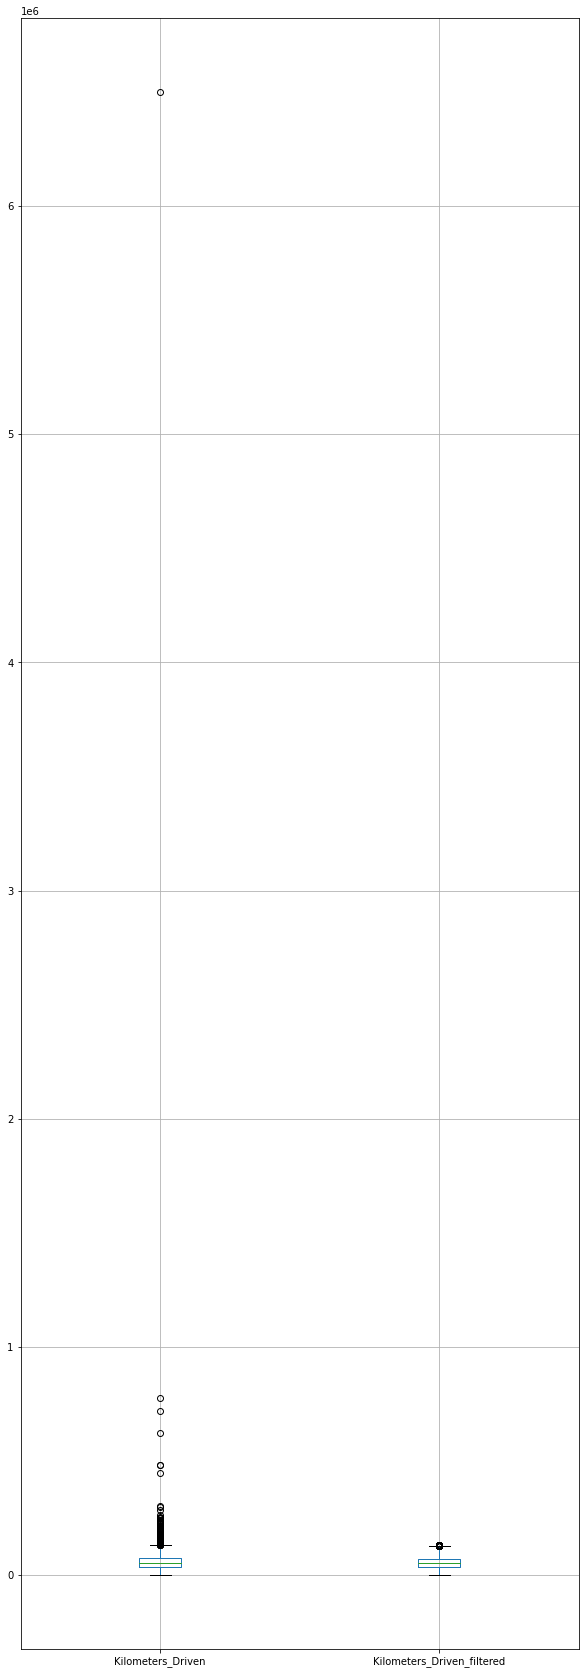

In [ ]:
df = pd.DataFrame(data={'Kilometers_Driven': raw_data.Kilometers_Driven})

Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1

filtered = df.query('(@Q1 - 1.5 * @IQR) <= Kilometers_Driven <= (@Q3 + 1.5 * @IQR)')
df.join(filtered, rsuffix='_filtered').boxplot(figsize=(10,30))
#df.boxplot(figsize=(10,30))

## **How is the trend of mileage values?**

In [ ]:
raw_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [ ]:
from sklearn.preprocessing import LabelEncoder

#merk_mobil = pd.DataFrame(data={'Name' : raw_data.Name.str.split().str.get(0).str.lower()})
#merk_mobil = pd.DataFrame(merk_mobil.groupby(merk_mobil.Name.tolist(),as_index=False).size()).rename(columns={0:'Jumlah Mobil'})

raw_data['Name'] = raw_data.Name.str.split().str.get(0).str.lower()
raw_data['Mileage'] = raw_data.Mileage.str.split().str.get(0).astype(float)
raw_data['Engine'] = raw_data.Engine.str.split().str.get(0).astype(float)

raw_data['Power'] = raw_data.Power.str.split().str.get(0)
raw_data.drop(raw_data.loc[raw_data['Power']=='null'].index, inplace=True)
raw_data['Power'] = raw_data['Power'].astype(float)

raw_data['Name'] = LabelEncoder().fit_transform(raw_data.Name.values)
raw_data['Location'] = LabelEncoder().fit_transform(raw_data.Location.values)
raw_data['Fuel_Type'] = LabelEncoder().fit_transform(raw_data.Fuel_Type.values)
raw_data['Transmission'] = LabelEncoder().fit_transform(raw_data.Transmission.values)
raw_data['Owner_Type'] = LabelEncoder().fit_transform(raw_data.Owner_Type.values)
raw_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,17,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,9,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,17,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,17,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,4.75
6015,10,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,4.00
6016,16,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
6017,17,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0,2.65


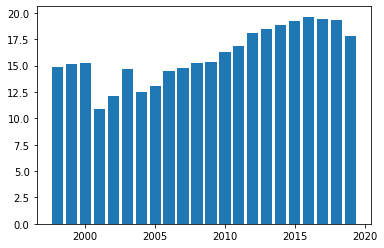

In [ ]:
df = pd.DataFrame(data={'Year':raw_data.Year,
                        'Mileage':raw_data.Mileage})

df['Mileage'] = df.Mileage.str.split().str.get(0).astype(float)
df = df.groupby('Year').mean()


plt.bar(list(df.index), df.Mileage.values)
plt.show()

## **How is the distribution of used cars priced?**

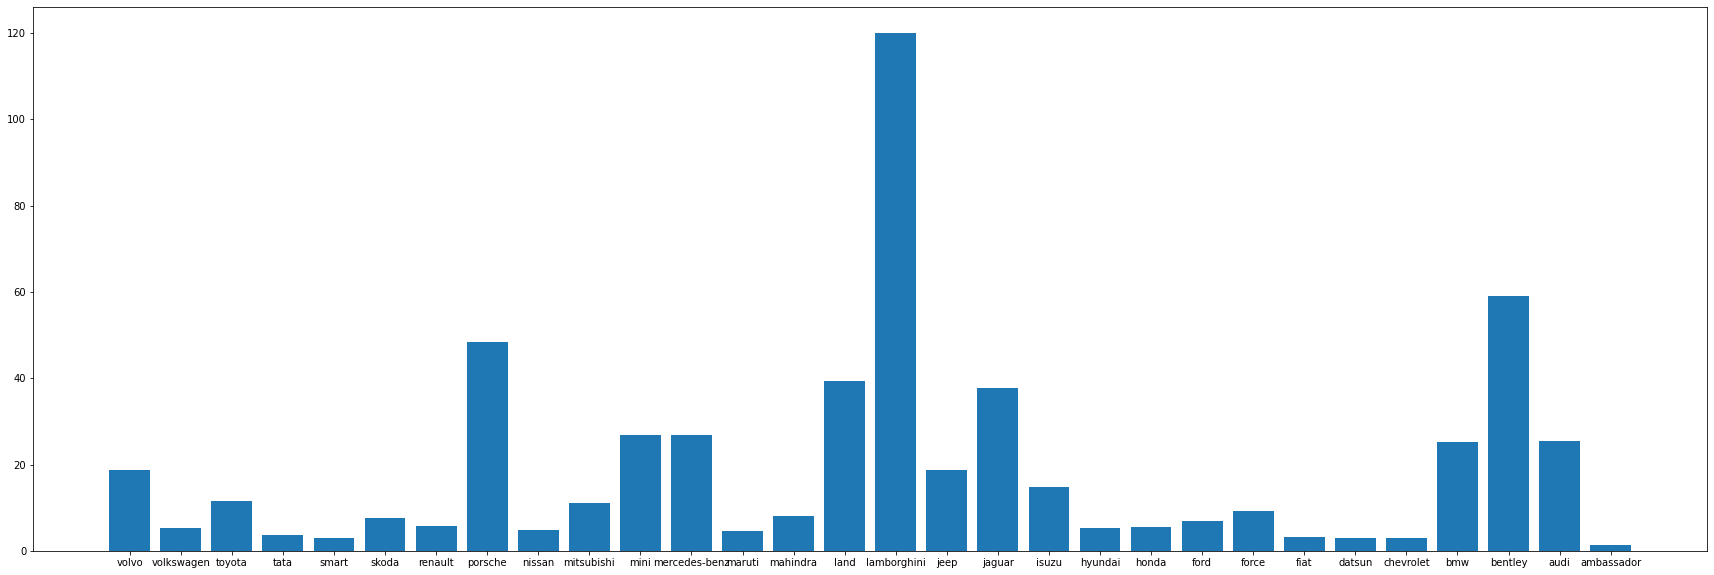

In [ ]:
raw_data['Name'] = raw_data.Name.str.split().str.get(0).str.lower()

df = pd.DataFrame(data={'Name':raw_data.Name,
                        'Price':raw_data.Price})

df = df.groupby('Name').mean()
df = df.sort_values('Name', ascending=False)

plt.figure(figsize=(30,10))
plt.bar(list(df.index), df.Price.values)
plt.show()

## **PCA Analysis**

,Price,PC1
Price,1.000000,0.665323
PC1,0.665323,1.000000


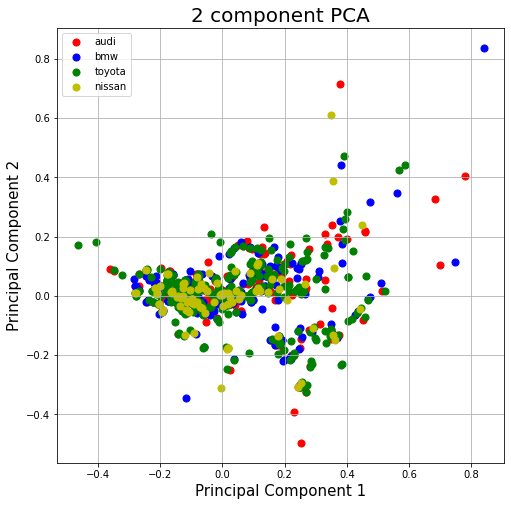

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

PATH = 'DSA_Compfest/used_car_data.csv'
raw_data = pd.read_csv(PATH)
data = raw_data['Name']

merk_mobil = pd.DataFrame(data={'Name' : raw_data.Name.str.split().str.get(0).str.lower()})
merk_mobil = pd.DataFrame(merk_mobil.groupby(merk_mobil.Name.tolist(),as_index=False).size()).rename(columns={0:'Jumlah Mobil'})

raw_data['Name'] = raw_data.Name.str.split().str.get(0).str.lower()
raw_data['Mileage'] = raw_data.Mileage.str.split().str.get(0).astype(float)
raw_data['Engine'] = raw_data.Engine.str.split().str.get(0).astype(float)

raw_data['Power'] = raw_data.Power.str.split().str.get(0)
raw_data.drop(raw_data.loc[raw_data['Power']=='null'].index, inplace=True)
raw_data['Power'] = raw_data['Power'].astype(float)

raw_data['Name'] = LabelEncoder().fit_transform(raw_data.Name.values)
raw_data['Location'] = LabelEncoder().fit_transform(raw_data.Location.values)
raw_data['Fuel_Type'] = LabelEncoder().fit_transform(raw_data.Fuel_Type.values)
raw_data['Transmission'] = LabelEncoder().fit_transform(raw_data.Transmission.values)
raw_data['Owner_Type'] = LabelEncoder().fit_transform(raw_data.Owner_Type.values)
raw_data = raw_data.dropna()

raw_data = raw_data.drop(columns=['Name', 'Location','Year','Fuel_Type', 'Owner_Type', 'Transmission'])

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(raw_data.values)
raw_data = pd.DataFrame(x_scaled, columns=raw_data.columns)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(raw_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data], axis = 1)
finalDf = finalDf.dropna()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['audi','bmw','toyota','nissan']
colors = ['r', 'b', 'g', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Name'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

df2 = pd.DataFrame(data={'Price':raw_data.Price,
                        'PC1':finalDf['principal component 1']}).dropna()

a = df2.corr(method='pearson')
a

In [ ]:
from sklearn.preprocessing import LabelEncoder

PATH = 'DSA_Compfest/used_car_data.csv'
raw_data = pd.read_csv(PATH)
raw_data

raw_data['Name'] = raw_data.Name.str.split().str.get(0).str.lower()
raw_data['Mileage'] = raw_data.Mileage.str.split().str.get(0).astype(float)
raw_data['Engine'] = raw_data.Engine.str.split().str.get(0).astype(float)

raw_data['Power'] = raw_data.Power.str.split().str.get(0)
raw_data.drop(raw_data.loc[raw_data['Power']=='null'].index, inplace=True)
raw_data['Power'] = raw_data['Power'].astype(float)

raw_data['Name'] = LabelEncoder().fit_transform(raw_data.Name.values)
raw_data['Location'] = LabelEncoder().fit_transform(raw_data.Location.values)
raw_data['Fuel_Type'] = LabelEncoder().fit_transform(raw_data.Fuel_Type.values)
raw_data['Transmission'] = LabelEncoder().fit_transform(raw_data.Transmission.values)
raw_data['Owner_Type'] = LabelEncoder().fit_transform(raw_data.Owner_Type.values)
raw_data = raw_data.dropna()
raw_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,17,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,9,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,17,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,17,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,4.75
6015,10,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,4.00
6016,16,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
6017,17,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0,2.65


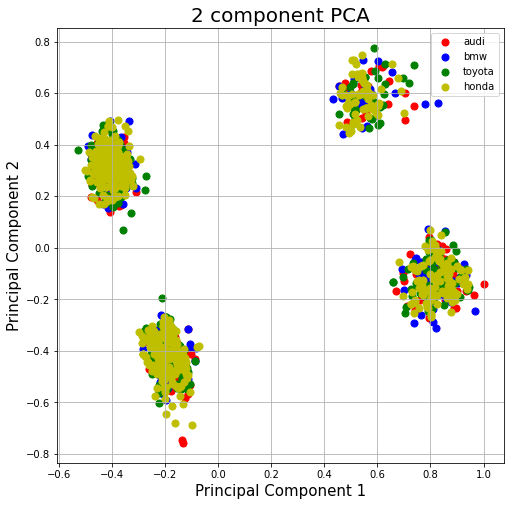

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

PATH = 'DSA_Compfest/used_car_data.csv'
raw_data = pd.read_csv(PATH)
data = raw_data['Name']

merk_mobil = pd.DataFrame(data={'Name' : raw_data.Name.str.split().str.get(0).str.lower()})
merk_mobil = pd.DataFrame(merk_mobil.groupby(merk_mobil.Name.tolist(),as_index=False).size()).rename(columns={0:'Jumlah Mobil'})

raw_data['Name'] = raw_data.Name.str.split().str.get(0).str.lower()
raw_data['Mileage'] = raw_data.Mileage.str.split().str.get(0).astype(float)
raw_data['Engine'] = raw_data.Engine.str.split().str.get(0).astype(float)

raw_data['Power'] = raw_data.Power.str.split().str.get(0)
raw_data.drop(raw_data.loc[raw_data['Power']=='null'].index, inplace=True)
raw_data['Power'] = raw_data['Power'].astype(float)

raw_data['Name'] = LabelEncoder().fit_transform(raw_data.Name.values)
raw_data['Location'] = LabelEncoder().fit_transform(raw_data.Location.values)
raw_data['Fuel_Type'] = LabelEncoder().fit_transform(raw_data.Fuel_Type.values)
raw_data['Transmission'] = LabelEncoder().fit_transform(raw_data.Transmission.values)
raw_data['Owner_Type'] = LabelEncoder().fit_transform(raw_data.Owner_Type.values)
raw_data = raw_data.dropna()

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(raw_data.values)
raw_data = pd.DataFrame(x_scaled, columns=raw_data.columns)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(raw_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data], axis = 1)
finalDf = finalDf.dropna()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['audi','bmw','toyota','honda']
colors = ['r', 'b', 'g', 'y']

for i in merk_mobil.index:
    if 'color' in i:
        colors.append(i)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Name'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()